In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random
%matplotlib inline

## Probality Theory
> Генеральная совокупность — вся изучаемая выборочным методом статистическая совокупность объектов и/или явлений общественной жизни (единиц отбора), имеющих общие качественные признаки или количественные переменные. Выборочная совокупность (выборка) — представительная часть генеральной совокупности.

> Дополнение события - это событие, которое не произойдет. Вероятность того, что событие A не произойдет, обозначается P(A'). Вероятность того, что события A и B произойдут одновременно, - это вероятность пересечения A и B. Вероятность пересечения событий A и B обозначается P(A ∩ B).

> Intersection	P(A ∩ B)
Probability of A and B
Union	P (A∪B)
Probability of A or B


### Матожидание 
![Формула матожидание]('https://cdn.uznaychtotakoe.ru/images/m-x-p-xi-xi-correcta-cke.jpg')
> m = ∑xipi - наиболее ожидаемое значение вероятности

In [234]:
# First variant to solve - Сумма попарных *
quanily = [2, 12, 3]
costs = [12.5, .5, 1.75]

partial_cost = []
for q, c in zip(quanily, costs):
    partial_cost.append(q * c)

print(sum(partial_cost))

36.25


In [236]:
# Second variant to solve
quanily = [2, 12, 3]
costs = [12.5, .5, 1.75]

partial_cost = [q * c for q, c in zip(quanily, costs)]

print(sum(partial_cost))

36.25


In [237]:
# Third variant 
quanily = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])

np.sum(quanily * costs)

36.25

In [243]:
# Взвесить каждый элемент 
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3)
val1 = np.array([10.0, 20.0, 30.0, 15.0, 16.0])

weights2 = np.full_like(val1, 1/5)
weights2

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [270]:
# Simple game
payoff = np.array([1.0, -.5]) 
probs = np.array([.49, .51])
np.dot(payoff, probs) # матожидание 

0.235

In [272]:
def is_even(value:float):
    return value % 2 == 0

winnings = 0.0
for t in range(1000000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -.5
    
winnings

249115.0

In [274]:
# Сумма квадратов 
values1 = np.array([-5, -3, -2,10])
squares = values1 * values1
print(squares, sum(squares))

[25  9  4  1] 39


In [275]:
# Ошибка и пример 
errors = np.array([5, -5, 3.2, -1.1])
error_df = pd.DataFrame({'errors': errors,'squared':errors * errors})
error_df

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


### Моделирование Монте-Карло
> Монте-Карло – это группа математических методов, которые используют генератор случайных чисел и применяют для моделирования процессов с неопределенностью. 
> Они эффективны для расчета бизнес-рисков и прогнозирования неблагоприятных событий, например перерасхода средств или отставания от графика.

> Метод был разработан американскими учеными Станиславом Уламом и Джоном фон Нейманом во время их секретной работы в рамках Манхэттенского проекта по созданию ядерного оружия в 1940-х годах. 
> Само название «Монте-Карло» появилось из-за необходимости присвоить методу кодовое слово. Хотя метод имеет отношение к случайным величинам, назвали его так не случайно.

> Коллега Улама, Николас Метрополис, предложил назвать разработанный метод в честь широко известного района княжества Монако. Существует предположение, что его вдохновила история о дяде Улама, который на деньги родственников играл в казино Монте-Карло. Название прижилось, а метод получил широкое распространение.
> Сегодня Монте-Карло используется в моделировании и помогает более эффективно принимать решения и строить точные долгосрочные прогнозы.

### Flipping Coin 
> Метод Монте-Карло: В общем случае это получение случайных значений из эксперимента. Другими словами, повторение одних и тех же процедур снова и снова и вычисление их вероятности.
> В этом учебнике мы начнем с подбрасывания монеты, поскольку в справедливом случае есть два случая (голова и решка), где каждый имеет 50% процент.


В дальнейшем для получения количества голов и хвостов по отдельности мы вычислили. Для этого мы можем использовать простую функцию суммирования матрицы, которая даст количество единиц в эксперименте. Затем просто вычтем эти единицы, чтобы получить нули, следующим образом,

In [2]:
def coint_flip():
    return random.randint(0, 1)

result_l = []

def monte_carlo(n):
    plt.subplots(figsize = (12,9))
    result = 0
    
    for i in range(n):
        flip_result = coint_flip()
        result = result +  flip_result
        
        prob_var = result / (i + 1)
        
        result_l.append(prob_var)
        
    plt.axhline(y = 0.5, color = 'r', linestyle = '-')
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    plt.plot(result_l)
    return result / n

Find value:  0.499524


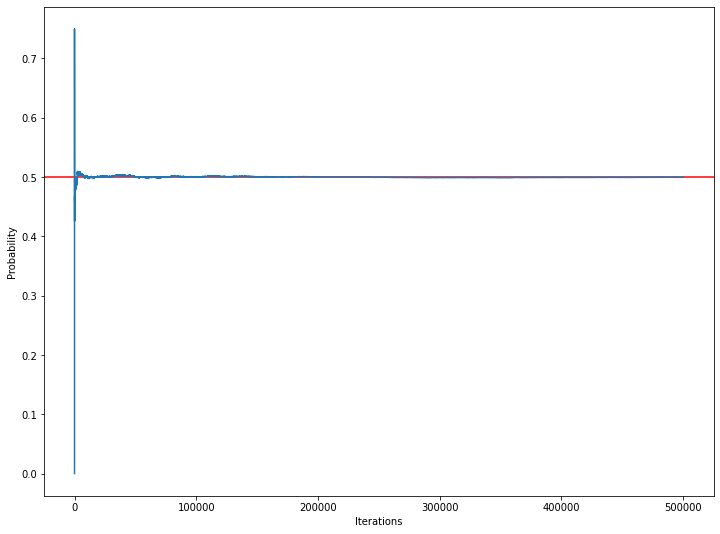

In [3]:
answear = monte_carlo(500000)
print('Find value: ',answear)

## Попадание в круг


In [7]:
m = input('Enter integer value: ')
n = 0 # попаданий в точку 
import math 
import random 
for i in range(int(m)):
    x = random.random()
    y = random.random()
    print(x, y)
    if math.sqrt(x ** 2 + y ** 2) < 1:
        n += 1

pi = 4 * n / int(m)
print(pi)


Enter integer value: 15
0.12124810260504548 0.11020548600757685
0.2175737721388945 0.8980676354071242
0.13422338066356365 0.411839062552808
0.14089880315184855 0.5402867861583891
0.8425179337683998 0.5756297417600695
0.7904516809411554 0.7411054112534834
0.7469705958614782 0.14981653323681632
0.9440927431026952 0.2986626655904475
0.6029704695666995 0.022347058121772734
0.4182378356300972 0.9328015070125137
0.7087645821115391 0.70669097661346
0.5722434922153904 0.35920365796551457
0.2352402206930605 0.42408173124285653
0.9765072386615192 0.6176559769291481
0.7988725320276292 0.667457163304727
2.4


## Проблема Монти Холла
> Парадокс впервые был сформулирован американским математиком Стивом Селвином ещё в 1975 году, но широкую известность он приобрёл благодаря популярному игровому шоу «Давайте заключим сделку». В честь ведущего этой телевикторины, которого звали Монти Холл, парадокс и получил своё название.
В чём же суть парадокса Монти Холла?

> Представьте, что перед вами три двери, как показано на рисунке ниже. За двумя дверьми находятся козы, за одной — автомобиль. Надо угадать дверь с автомобилем, и он ваш.

### Выгодно ли менять дверь ?
![Выбор двери](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png)

> 1/3 - car 1/3 - goat 1/3 - goat

## Выбрали одну дверь и получили результатм с 1/3 до 2/3
![Выбор после открытие одной двери](https://miro.medium.com/max/1400/0*2VPhlzymLpGTrzG3.png)

Winning prob if you always switch:  0.688
Winning prob if you stay original choise:  0.312


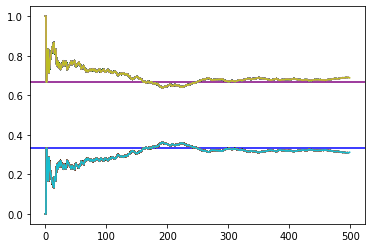

In [16]:
doors = ['goat', 'goat', 'car']

switch_win_prob = []
stick_win_prob = []

plt.axhline(y = 0.6666, color = 'purple', linestyle = '-')
plt.axhline(y = 0.3333, color = 'b', linestyle = '-')

def monte_carlo(n):
    
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
        
        random.shuffle(doors)
        
        k = random.randrange(2)
        
        if doors[k] != 'car':
            switch_wins += 1
        else:
            stick_wins += 1
        
        switch_win_prob.append(switch_wins / (i + 1))
        stick_win_prob.append(stick_wins / (i + 1))
        
        plt.plot(switch_win_prob)
        plt.plot(stick_win_prob)
        
    print('Winning prob if you always switch: ',switch_win_prob[-1])
    print('Winning prob if you stay original choise: ',stick_win_prob[-1])
        
monte_carlo(500)

### Rules 
    1. В мешочке лежат карточки с числами от 1 до 100
    2. Пользователь делает ставку четное или нечетное
    3. 10, 11 - спец числа где 10 - нечет, 11 - чет
    4. Если вы ставите на четное число и получаете 10, вы проигрываете
    5. Если вы ставите на нечетное число и получаете 11, вы проигрываете

Even or Odd: Odd
All tries:  [18000, 6000, -4000, 20000, -4000, -6000, 4000, 18000, 14000, 12000]
Player start with 10000 each time 10
Total capital after all ties:  78000


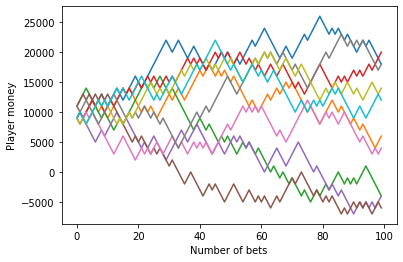

In [43]:
choice = input('Even or Odd: ')
if choice == 'Even':
    def pick_note():
        
        note = random.randint(1, 101)
        
        # проверяем условие игры
        
        if note % 2 != 0:
            return False 
        elif note % 2 == 0:
            return True

elif choice == 'Odd':
    def pick_note():
        
        note = random.randint(1, 101)
        
        # проверяем условие игры
        if note % 2 == 0 :
            return False
        elif note % 2 == 1:
            return True
         
# Функция главной игры
def play(total_money, bet_money, total_plays):
    
    num_of_plays = []
    money = []
    
    play = 1
    
    for play in range(total_plays):
        if pick_note():
            
            total_money = total_money + bet_money
            num_of_plays.append(play)
            money.append(total_money)
        
        else:
            total_money = total_money - bet_money
            
            num_of_plays.append(play)
            
            money.append(total_money)
        
    plt.ylabel('Player money')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays, money)
    plt.grid()
    final_funds.append(money[-1])
    return final_funds

final_funds = []

start_capital = 10000
bet_strategy = 1000

number_of_tries = 10 # дней когда ходили попыток


number_of_games_attended_each_try = 100 # количество игр

for i in range(number_of_tries):
    end_fund = play(start_capital, bet_strategy
                    , number_of_games_attended_each_try)
    
print('All tries: ', end_fund)
print(f'Player start with {start_capital} each time {number_of_tries}') # del squares

print('Total capital after all ties: ', sum(end_fund))

#print('Capital change in percent:', sum(end_fund) / len(end_fund) - start_capital) * 100

In [42]:
even = []
odd = []

for i in range(1, 1001):
    if i % 2 == 0:
        even.append(i)
    elif i % 2 == 1:
        odd.append(i)
        
sum_even = sum(even)
sum_odd = sum(odd)
print(len(even), len(odd))

500 500


### Slide 15
> X1and X2are random variables of the results of rolling 2 fair dice. 
> Use a numpy simulation to show the distribution of the sum of the dice, i.e. X1+ X2.

In [50]:
quanily = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])

np.sum(quanily * costs)

36.25

### Slide 16 
> X1and X2are random variables of the results of rolling 2 fair dice. 
> Use a numpy simulation to show the distribution of the sum of the dice, i.e. X1+ X2.

### Slide 18
> X1, X2and X3are random variables of the results of rolling 3 fair dice.
> Use a numpy simulation to show the distribution of:
 1. P(X1+ X2+ X3)
 2. P(X1+ X2+ X3| X3= 4)
 3. P(X1+ X2+ X3| X1+ X2= 4)
 4. Explain the results.

### Slide 27
> Design and implement a Monte Carlo experiment to estimate the value of pi.